# Car Price Prediction

- A Chinese automobile company Geely Auto wants to explore US market.
- Factors affecting car price:
    - variables significant in predicting the price of a car     
- regression problem

In [1]:
#Load libraries
import keras
import numpy as np
import pandas as pd

## Step 1: Load Data

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Step 2: Preprocessing
    - Check Missing Values (If Exist: Fill each record with mean of its feature)
    - Find and remove duplicates
    - Drop unnecessary columns
    - categorical data conversion

In [3]:
df.shape

(205, 26)

In [4]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
df.isnull().sum()   

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
#need to convert:
# CarName              object
# fueltype             object
# aspiration           object
# doornumber           object
# carbody              object
# drivewheel           object
# enginelocation       object
# enginetype           object
# cylindernumber       object
# fuelsystem           object


from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['CarName'] = labelencoder.fit_transform(df['fueltype'])
df['fueltype'] = labelencoder.fit_transform(df['fueltype'])
df['aspiration'] = labelencoder.fit_transform(df['aspiration'])

df['doornumber'] = df['doornumber'].map({'two':2,'four':4})

df['carbody'] = labelencoder.fit_transform(df['carbody'])
df['drivewheel'] = labelencoder.fit_transform(df['drivewheel'])
df['enginelocation'] = labelencoder.fit_transform(df['enginelocation'])
df['enginetype'] = labelencoder.fit_transform(df['enginetype'])
df['cylindernumber'] = labelencoder.fit_transform(df['cylindernumber'])
df['fuelsystem'] = labelencoder.fit_transform(df['fuelsystem'])


In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName               int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
#need to delete: dropping car id


## Step 3:  Standarize & Split 

In [28]:
X = df.iloc[:, 1:-1].values   
y = df.iloc[:, -1].values     

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)


In [30]:

mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std


## Step 4:  Build, Compile & Validate Model

In [31]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(24,)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1)) 
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [32]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 200
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_x_train = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
    partial_y_train = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    h = model.fit(partial_x_train, partial_y_train,validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = h.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


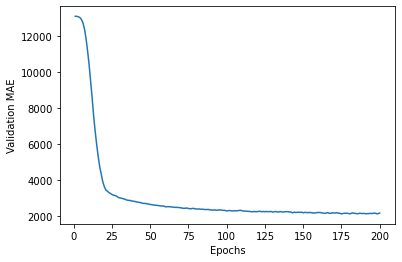

In [33]:
#Now plotting:

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

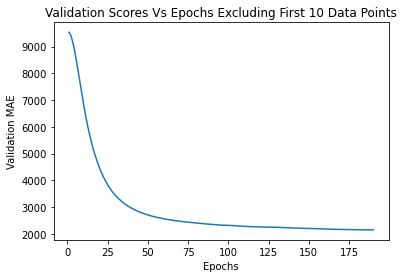

In [34]:
##Plotting by excluding first 10 points

def smooth_curve(points, factor= 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation Scores Vs Epochs Excluding First 10 Data Points')
plt.show()

## Step 5: Train the Model with Epochs and validate it

In [35]:
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)

## Step 6: Evaluation Step & Prediction

In [36]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 11229015.0000 - mae: 1923.3783


In [37]:
print("The mae score is: ",test_mae_score)
print("The mse score: is: ",test_mse_score)

The mae score is:  1923.3782958984375
The mse score: is:  11229015.0
